In [357]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.utils import plot_model
from matplotlib import pyplot as plt
import numpy as np

In [40]:
batch_size = 64
num_classes = 10
epochs = 30

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test /= 255
print('train samples:' , X_train.shape[0])
print('test samples:', X_test.shape[0])

train samples: 60000
test samples: 10000


In [43]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [358]:
model = Sequential()
model.add(Dense(num_classes, activation='sigmoid', input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))
#model.add(Dropout(0.2))

In [354]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [359]:
model.compile(loss='categorical_crossentropy',
#    loss='mse',
    optimizer='rmsprop',
metrics=['accuracy'])

In [360]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0, batch_size=batch_size,)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 36us/step - loss: 1.2183 - acc: 0.7476 - val_loss: 0.6916 - val_acc: 0.8743
Epoch 2/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.5330 - acc: 0.8831 - val_loss: 0.4247 - val_acc: 0.8963
Epoch 3/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.3919 - acc: 0.8962 - val_loss: 0.3545 - val_acc: 0.9032
Epoch 4/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.3461 - acc: 0.9038 - val_loss: 0.3256 - val_acc: 0.9102
Epoch 5/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.3218 - acc: 0.9092 - val_loss: 0.3091 - val_acc: 0.9143
Epoch 6/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.3059 - acc: 0.9125 - val_loss: 0.2997 - val_acc: 0.9154
Epoch 7/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.2938 - acc: 0.9154 - val_loss: 0.2903 - val_acc

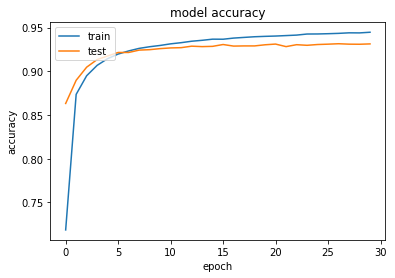

In [344]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [345]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.010616814819537104
Test accuracy: 0.9313


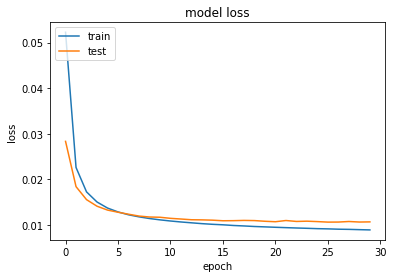

In [346]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [348]:
import imageio
three = imageio.imread('numbers/three.bmp')
type(three)

imageio.core.util.Array

### Guess numbers from pictures:

In [349]:
def draw_n_tell(filename=""):
    """ Returns the predicted number for a given bitmap file.
    Data must be stored as 28x28x8 bit values. Files need be stored in numbers subfolder and called without extension. """
    num = imageio.imread(f"numbers/{filename}.bmp")
    num = 255-num
    num_l = num.reshape(784,1).astype('float32').T
#    print(model.predict(num_l).round(2))
    plt.imshow(num, cmap=plt.cm.Blues)
    accuracy = ((max(max(model.predict(num_l))))*100).round(2)
#    print(model.predict(num_l))
    pred_val = np.argmax(model.predict(num_l))
#    print(model.predict(num_l).sum())
#    dic = {0:"" , 1:"" ,2:"2" ,3:"0" ,4:"" ,5:"5" ,6:"8" ,7: "4" ,8:"1" ,9:"9" }
    print(f"I am {accuracy}% sure this is a " f"{pred_val}. But then, I'm just a neural network trained on the MNIST dataset.")
#    plt.axis('on')

I am 98.47% sure this is a 3. But then, I'm just a neural network trained on the MNIST dataset.


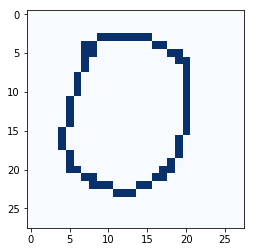

In [362]:
draw_n_tell("zero")

### 